# FLIGHT PRICE PREDICTION PROJECT

In [1]:
# Import the needed libraries
from pyforest import*
from chart_studio.plotly import plot, iplot
import cufflinks as cf
import seaborn as sns

%matplotlib inline

In [4]:
pip install cufflinks

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ---------------------------------------- 81.7/81.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=91a008cf17356ac6d3154395830a8376581df6c0ecf8349004c3710ea06a5f5c
  Stored in directory: c:\users\cjay\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


### Import the the  dataset

In [81]:
df = pd.read_excel('Data_Train.xlsx')

<IPython.core.display.Javascript object>

In [80]:
df1 = pd.read_excel('Test_set.xlsx')

<IPython.core.display.Javascript object>

In [85]:
df1['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [4]:
df['Dep_Time'] = df['Dep_Time'].str.replace(':','.')

In [5]:
df['Dep_Time'] = df['Dep_Time'].astype(float)

In [6]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time           float64
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price                int64
dtype: object

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22.20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9.25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18.05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16.50,21:35,4h 45m,1 stop,No info,13302


In [26]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

### Automated Exploratory Data Analysis

In [11]:
!pip install ydata-profiling

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.



     ---------------------------------------- 0.0/352.3 kB ? eta -:--:--
     ------------------------------------  348.2/352.3 kB 21.1 MB/s eta 0:00:01
     -------------------------------------- 352.3/352.3 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/102.7 kB ? eta -:--:--
     ---------------------------------------- 102.7/102.7 kB ? eta 0:00:00
     ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
     ---------------------------------------- 151.4/151.4 kB ? eta 0:00:00
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


In [16]:
import ydata_profiling as pf

In [20]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Manual Exploratory Data Analysis

In [21]:
df.shape

(10682, 11)

In [25]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time           float64
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price                int64
dtype: object

In [26]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [108]:
# Removing the Nan Values from the dataset
df.dropna(how='any', inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Feature Engineering

In [66]:
def all(data):
    df = pd.read_excel(f'{data}')
    
    # Removing the Nan Values from the dataset
    df.dropna(how='any', inplace=True)
    
    #Date_of_journey
    import datetime as dt
    df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')
    df['Day_of_Journey'] = (df['Date_of_Journey']).dt.day
    df['Month_of_Journey'] = (df['Date_of_Journey']).dt.month
    # Dropping the Date_of_Journey
    df.drop(['Date_of_Journey'],axis=1,inplace=True)
    
    
    #Dep_time
    # Convert to datetime
    df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
    df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
    df.drop(['Dep_Time'],axis=1,inplace=True)
    
    # Arrival_Time
    # Convert to datetime
    df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
    df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
    df.drop('Arrival_Time',axis=1,inplace=True)
    
    # Duration
    duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based space ' '
    duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
    df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one ﴾in this case the 'h'﴿
    df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last  one ﴾in this case the 'm'﴿
    #we can now drop the 'Duration'
    df.drop(["Duration"],axis=1,inplace=True)
    
    for i in df:
        df.replace('New Delhi','Delhi',inplace=True)
    
    # Apply OneHot Encoding on the categorical variables
    # Handling Categorical Values
    df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops': 3, '4 stops': 4})
    air_dummy=pd.get_dummies(df['Airline'], drop_first = True)

    source_dest_dummy = pd.get_dummies(df[['Source','Destination']], drop_first=True)
    df = pd.concat([air_dummy,source_dest_dummy,df], axis = 1)
    
    df.drop(['Airline','Source','Destination','Route','Additional_Info'], inplace =True, axis = 1)

    
    return df

    

In [55]:
df_train = all('Data_Train.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
df_train.shape

(10682, 31)

In [57]:
df_train.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,3,16,50,21,35,4,45


#### Converting **Date_of_Journey** to **datetime** format with regards to **day** and **month**

**Date_of_journey**

In [109]:
import datetime as dt
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')
df['Day_of_Journey'] = (df['Date_of_Journey']).dt.day
df['Month_of_Journey'] = (df['Date_of_Journey']).dt.month

<IPython.core.display.Javascript object>

In [110]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [111]:
# Dropping the Date_of_Journey
df.drop(['Date_of_Journey'],axis=1,inplace=True)

#### Converting **Dep_time** to **datetime** format with regards to **hour** and **minute**

**Dep_time**

In [112]:
# Convert to datetime
df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [114]:
df.drop(['Dep_Time'],axis=1,inplace=True)

#### Converting **Arrival_time** to **datetime** format with regards to **hour** and **minute**

**Arrival_Time**

In [115]:
# Convert to datetime
df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [117]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


#### Converting **Duration** to  **hour** and **minute**

**Duration**

In [134]:
df['Duration'].value_counts().head(50)

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h          64
9h 50m      64
5h          63
11h 45m     62
11h         62
5h 15m      62
1h 20m      61
14h 25m     61
6h 35m      60
10h 30m     57
22h 55m     57
12h 10m     57
12h 45m     56
5h 45m      54
16h 5m      53
11h 30m     52
7h 20m      52
12h 30m     52
4h 55m      51
15h 10m     51
8h 25m      50
10h 15m     50
12h         49
10h         49
10h 25m     49
12h 15m     48
Name: Duration, dtype: int64

In [7]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one ﴾in this case the 'h'﴿
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last  one ﴾in this case the 'm'﴿


In [8]:
#we can now drop the 'Duration'
df.drop(["Duration"],axis=1,inplace=True)

In [9]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

## Count of Airlines 

In [10]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

## Airline vs Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers Premium economy'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'Air India'),
  Text(5, 0, 'Vistara Premium economy'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'IndiGo'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'SpiceJet'),
  Text(11, 0, 'Trujet')])

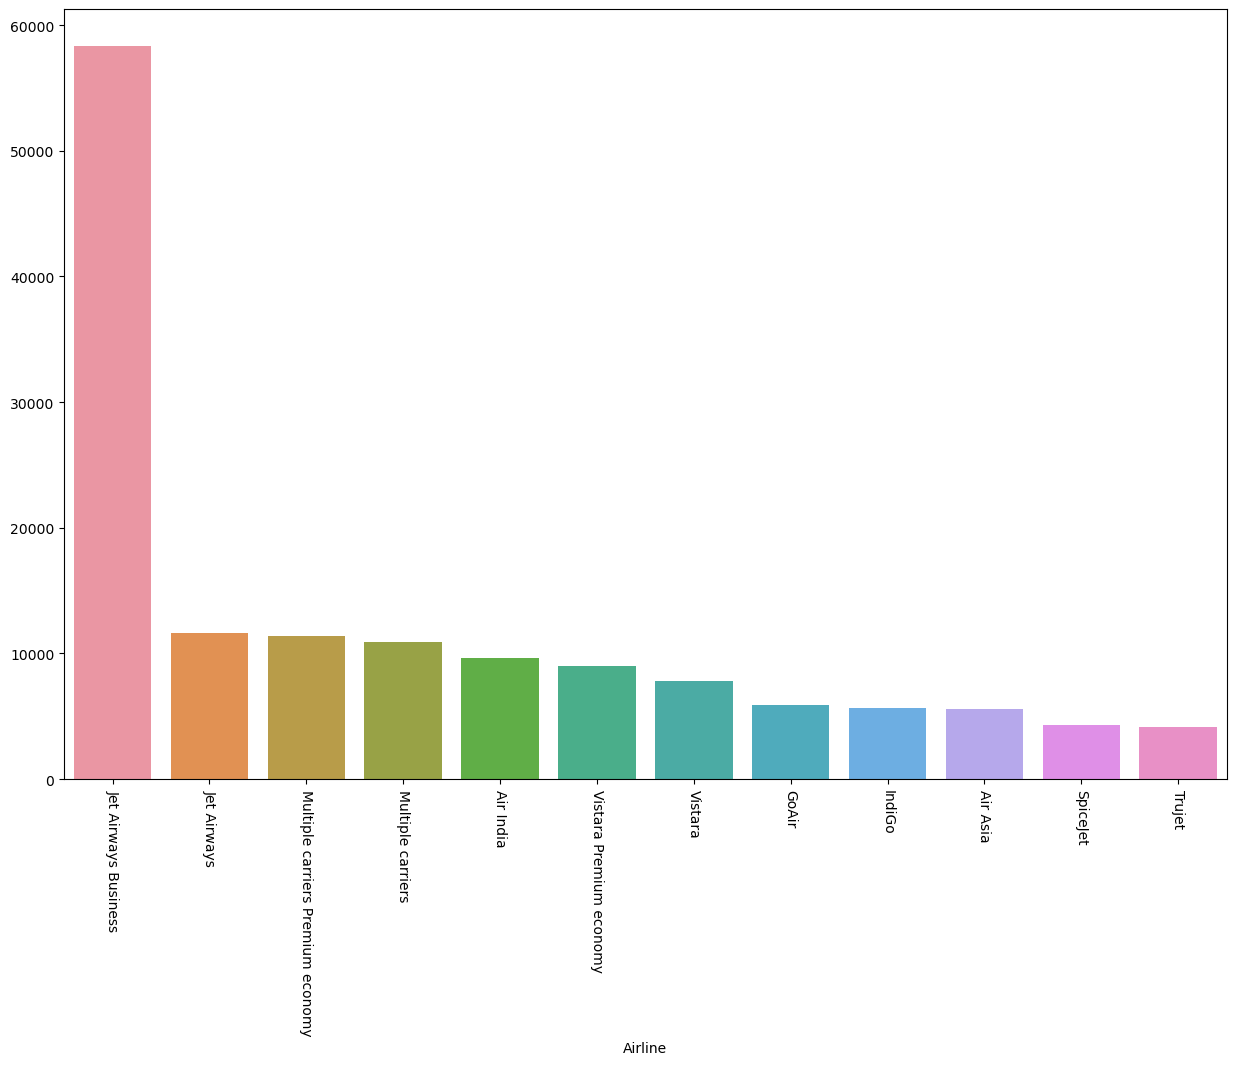

In [19]:
airPrices = df_train.groupby('Airline')['Price'].mean().sort_values(ascending = False)

fig = plt.figure(figsize=(15,10))
sns.barplot(data = df_train, x = airPrices.index, y=airPrices.values)
plt.xticks(rotation=270)

**Jet Airways Business has the highest price with Trujet having the lowest**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

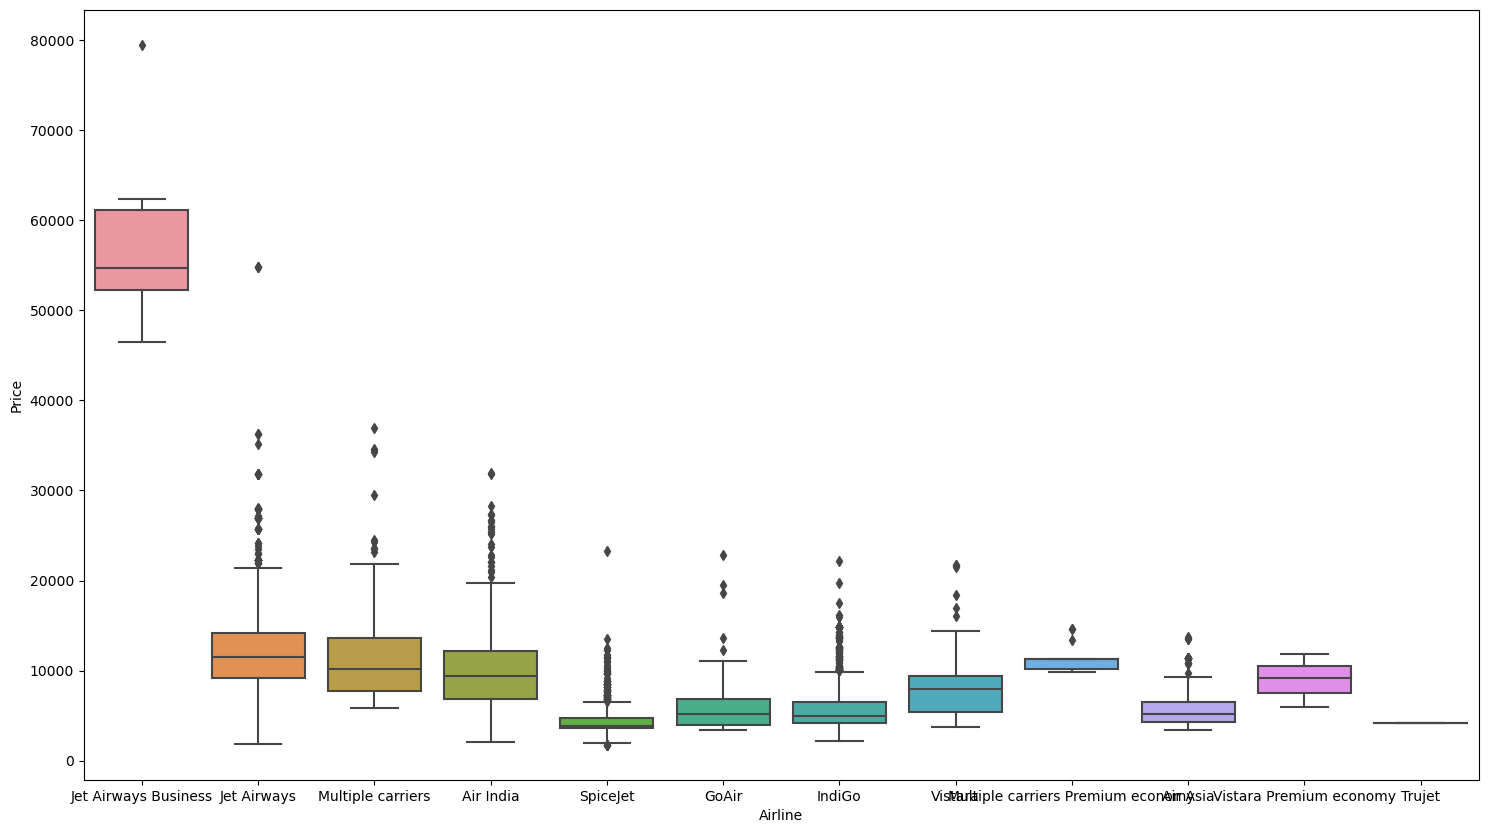

In [20]:
plt.figure(figsize=(18,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show

## Price based on number of stops

In [21]:
df_train.groupby(['Airline', 'Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

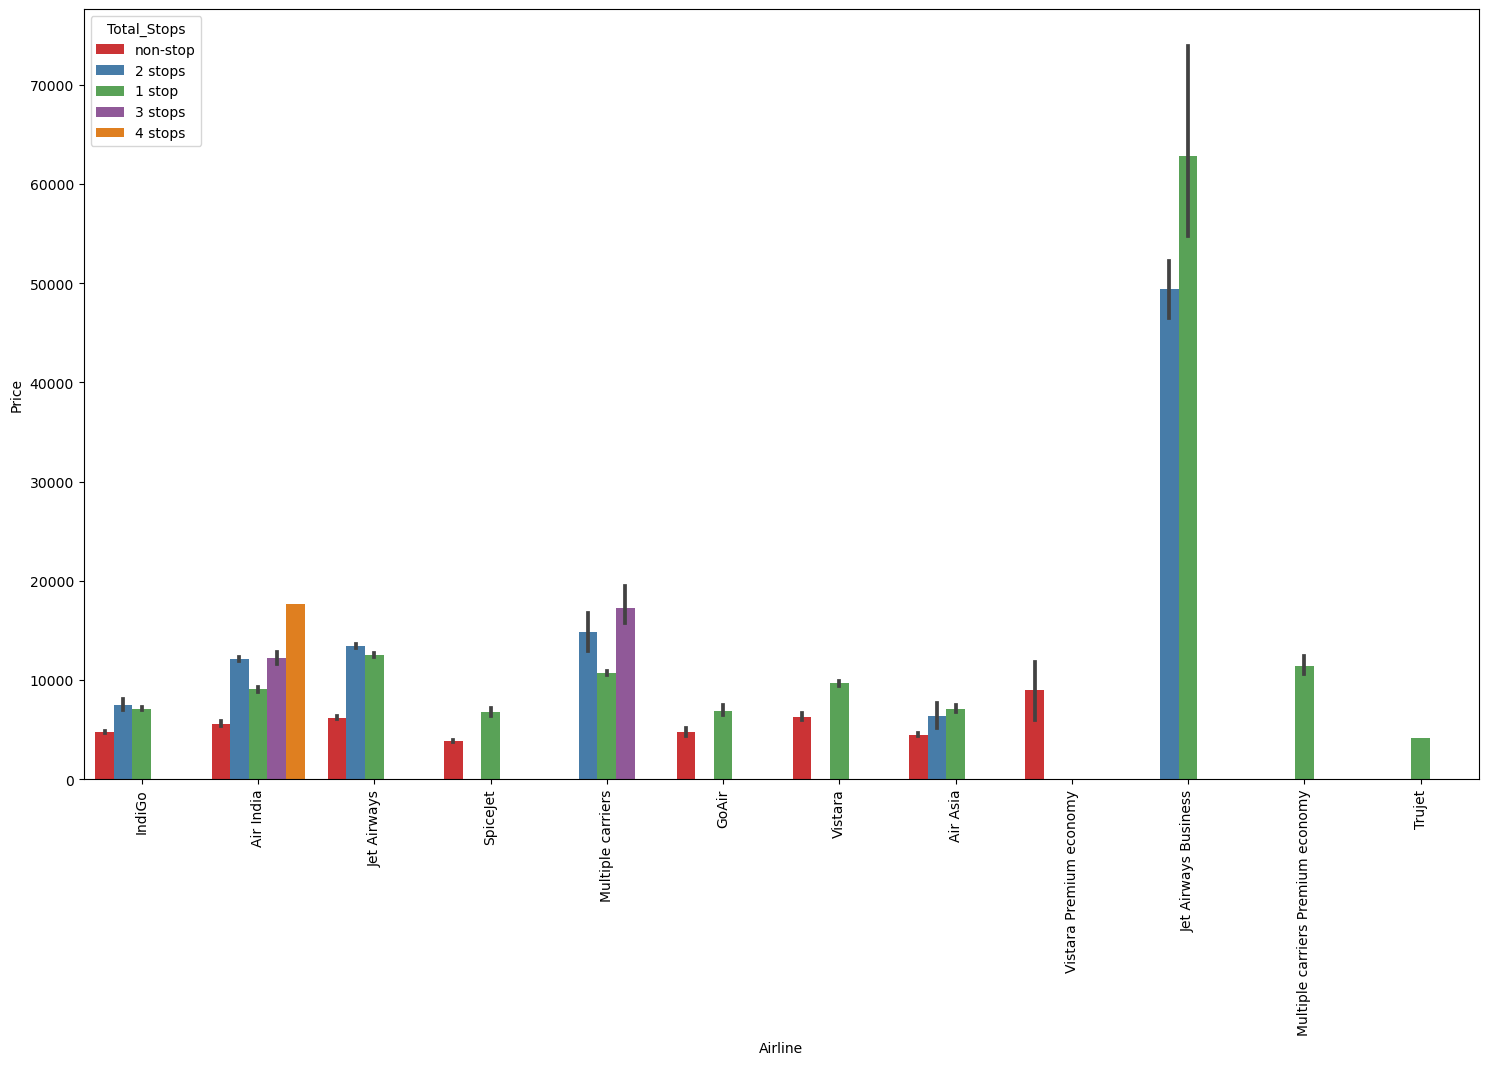

In [22]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

**One Stop and two stops Jet Airways Business is having the highest price**

In [23]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

## Source vs Price

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

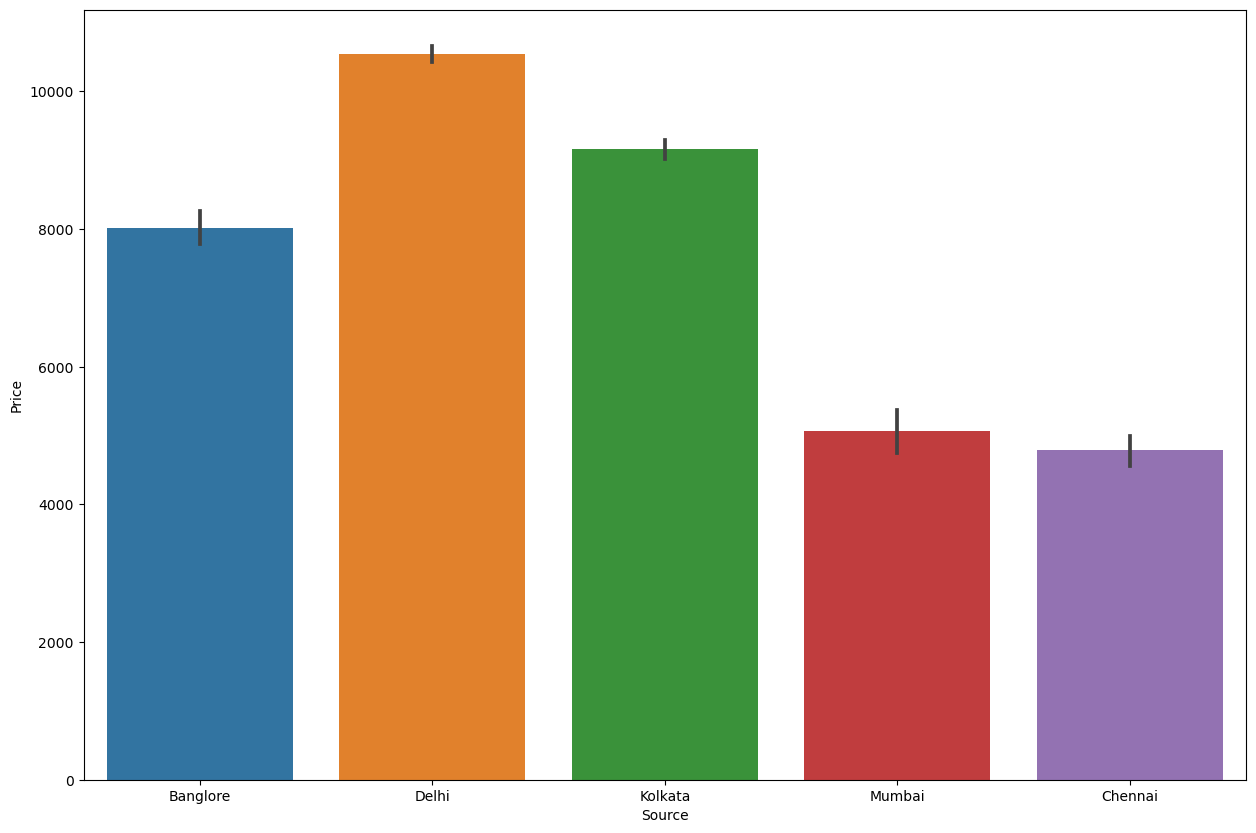

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show

## Destination vs Price

<IPython.core.display.Javascript object>

<Axes: xlabel='Destination', ylabel='Price'>

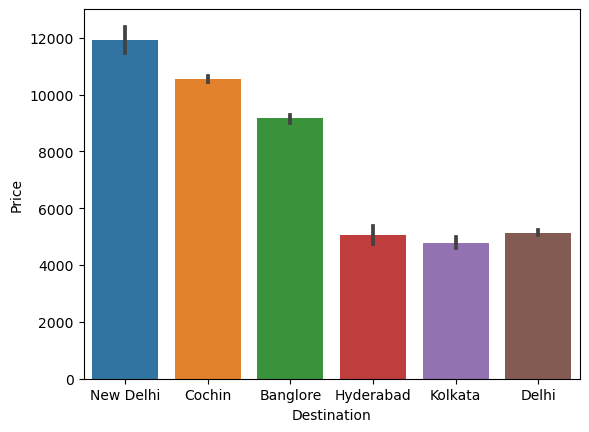

In [25]:
fig = plt.figure()
sns.barplot(data=df_train.sort_values('Price',ascending=False), x = 'Destination', y = 'Price',)

In [33]:
for i in df_train:
    df_train.replace('New Delhi','Delhi',inplace=True)

In [34]:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [35]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

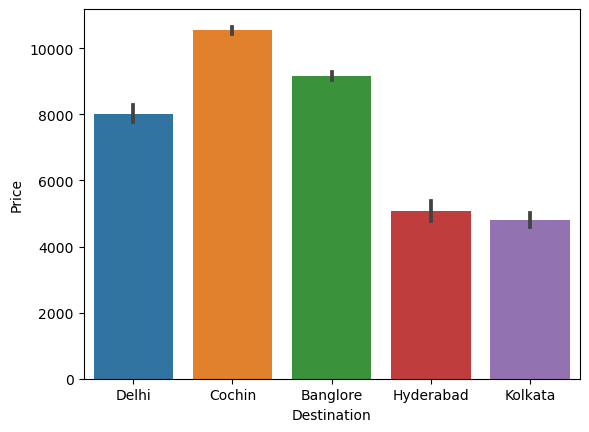

In [36]:
plt.figure()
sns.barplot(y='Price',x='Destination',data=df_train.sort_values('Price',ascending=False))
plt.show

<IPython.core.display.Javascript object>

C:\Users\CJay\AppData\Local\Temp\ipykernel_13404\2460604298.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

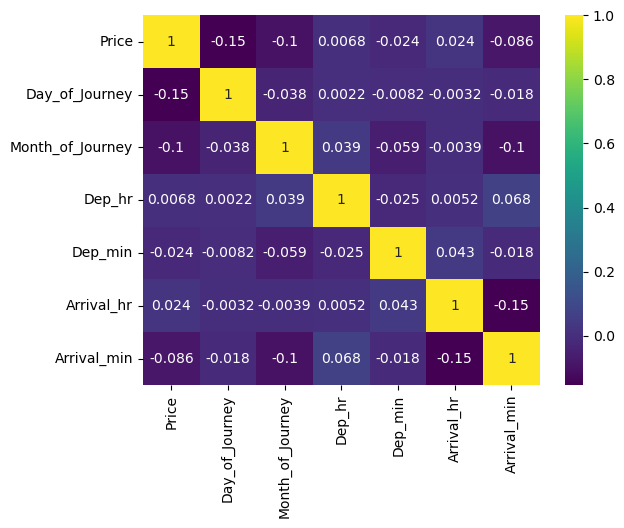

In [40]:
plt.figure()
sns.heatmap(df_train.corr(),annot=True, cmap='viridis')

## Apply OneHot Encoding on the categorical variables

In [43]:
# Handling Categorical Values
df_train['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops': 3, '4 stops': 4})
air_dummy=pd.get_dummies(df_train['Airline'], drop_first = True)

source_dest_dummy = pd.get_dummies(df_train[['Source','Destination']], drop_first=True)
df_train = pd.concat([air_dummy,source_dest_dummy,df_train], axis = 1)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
df_train.drop(['Airline','Source','Destination'], inplace =True, axis = 1)

In [67]:
df_train = all('Data_Train.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
df_train.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey', 'Dep_hr',
       'Dep_min', 'Arrival_hr', 'Arrival_min', 'duration_hr', 'duration_min'],
      dtype='object')

# Test Data

In [71]:
df_test = all('Test_set.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
df_test.shape, df_train.shape

((2671, 27), (10682, 29))

In [78]:
df_test.isnull().sum()

Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Vistara                              0
Vistara Premium economy              0
Source_Chennai                       0
Source_Delhi                         0
Source_Kolkata                       0
Source_Mumbai                        0
Destination_Cochin                   0
Destination_Delhi                    0
Destination_Hyderabad                0
Destination_Kolkata                  0
Total_Stops                          0
Day_of_Journey                       0
Month_of_Journey                     0
Dep_hr                               0
Dep_min                              0
Arrival_hr                           0
Arrival_min                          0
duration_hr              

In [79]:
df_train.isnull().sum()

Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Source_Chennai                       0
Source_Delhi                         0
Source_Kolkata                       0
Source_Mumbai                        0
Destination_Cochin                   0
Destination_Delhi                    0
Destination_Hyderabad                0
Destination_Kolkata                  0
Total_Stops                          0
Price                                0
Day_of_Journey                       0
Month_of_Journey                     0
Dep_hr                               0
Dep_min                              0
Arrival_hr               

# Model building and Hyperparameter Tuning

In [87]:
x = df_train.drop('Price', axis=1)
y= df_train['Price']

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [97]:
def r2(model):
    from sklearn.metrics import r2_score
    print(f"The r2 Score : {round(r2_score(y_test,model)*100,2)}%")

### 1. ExtraTreesRegressor

In [98]:
# import the libraries
from sklearn.ensemble import ExtraTreesRegressor

# Create the model
model_etr = ExtraTreesRegressor()

# Fit the model
model_etr.fit(x_train,y_train)

# Predict the model
etr_pred = model_etr.predict(x_test)

# Evaluate the r2 Score
r2(etr_pred)

The r2 Score : 80.07%


**Future Importance**

<IPython.core.display.Javascript object>

<Axes: >

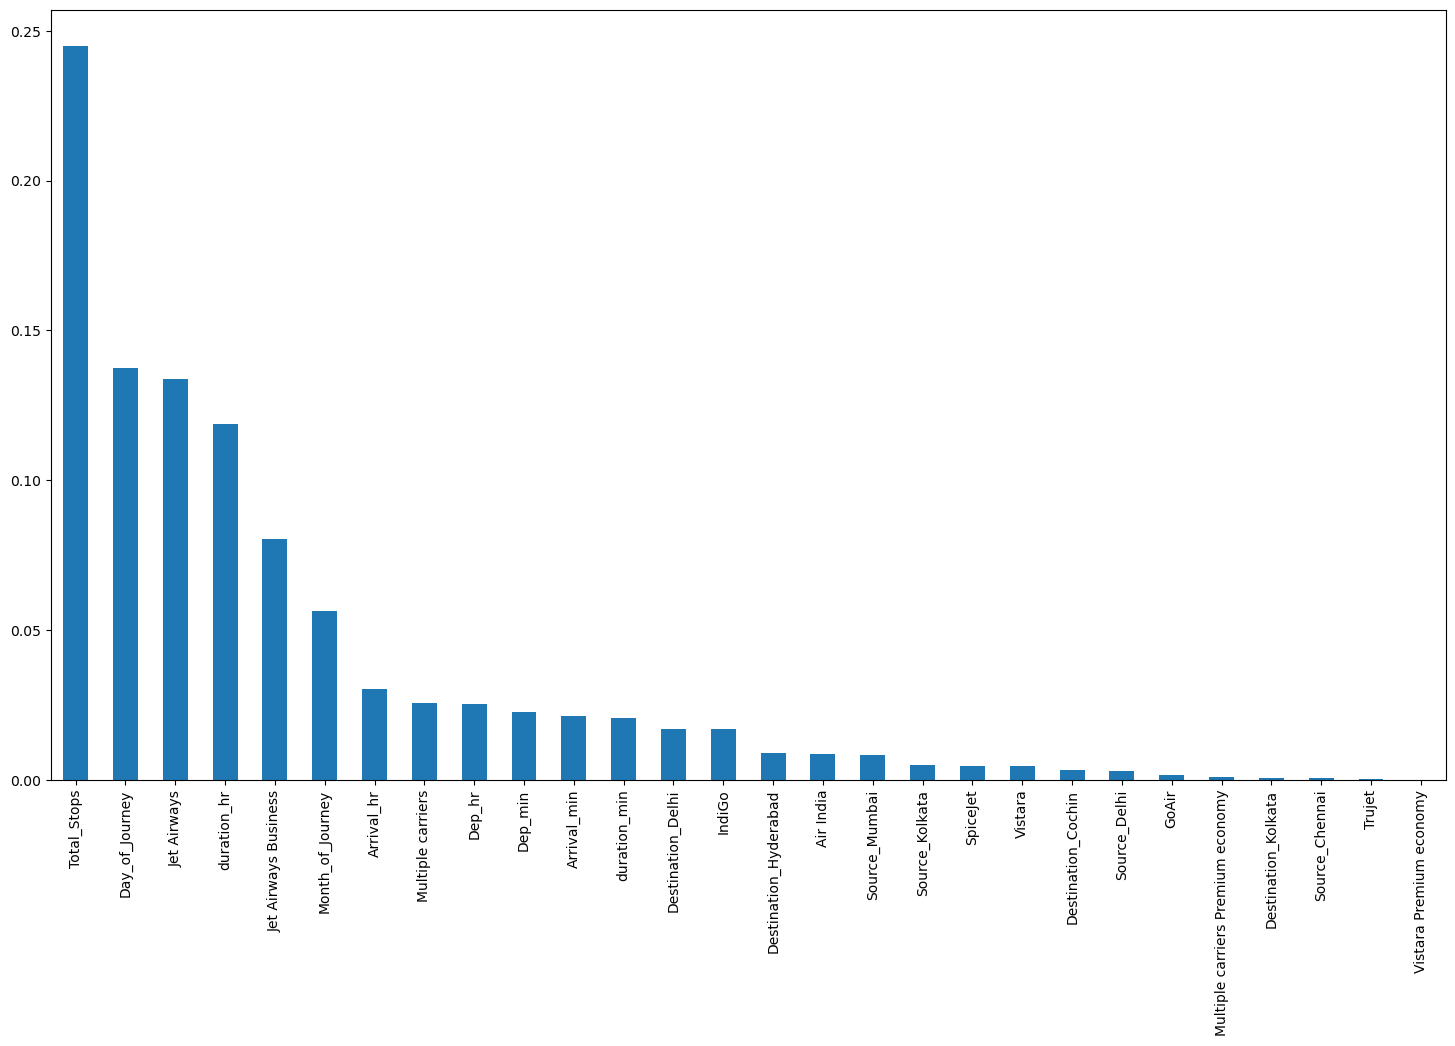

In [93]:
pd.Series(model_etr.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

### 2. Random Forest Regressor

In [100]:
# import the libraries
from sklearn.ensemble import RandomForestRegressor

# Create the model
model_rfr = RandomForestRegressor()

# Fit the model
model_rfr.fit(x_train,y_train)

# Predict hte model
rfr_pred = model_rfr.predict(x_test)

# Evaluate the r2 Score
r2(rfr_pred)

The r2 Score : 79.8%


## Hyperparameters

### 3. RandomizedSearchCV

In [102]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

params={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Creating the model
model_rcv = RandomizedSearchCV(estimator=model_rfr, param_distributions=params,scoring='neg_mean_squared_error',n_iter=10,cv=3, random_state=42, n_jobs=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
# Fit the model
model_rcv.fit(x_train,y_train)

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTree

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [104]:
# Predict the mode
rcv_pred = model_rcv.predict(x_test)

# Evaluate the model
r2(rcv_pred)

The r2 Score : 81.11%


In [105]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rcv_pred))
print('MSE',mean_squared_error(y_test,rcv_pred))

MAE 1161.4133233646253
MSE 3791958.034267858


### 4. CatBoost

In [106]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [107]:
# import the library
from catboost import CatBoostRegressor

# Create the model
model_cat = CatBoostRegressor()

# Fit the model
model_cat.fit(x_train,y_train)

# Predict the model
cat_pred = model_cat.predict(x_test)

# Evaluate the model
r2(cat_pred)

Learning rate set to 0.055875
0:	learn: 4544.2566926	total: 177ms	remaining: 2m 56s
1:	learn: 4393.4162678	total: 179ms	remaining: 1m 29s
2:	learn: 4275.1659616	total: 181ms	remaining: 1m
3:	learn: 4151.7504345	total: 183ms	remaining: 45.5s
4:	learn: 4054.5486008	total: 185ms	remaining: 36.8s
5:	learn: 3950.3098916	total: 187ms	remaining: 30.9s
6:	learn: 3852.2572176	total: 189ms	remaining: 26.8s
7:	learn: 3749.1206923	total: 191ms	remaining: 23.7s
8:	learn: 3656.7092955	total: 193ms	remaining: 21.2s
9:	learn: 3569.4078926	total: 195ms	remaining: 19.3s
10:	learn: 3486.9820891	total: 197ms	remaining: 17.7s
11:	learn: 3425.0487937	total: 199ms	remaining: 16.4s
12:	learn: 3368.1239395	total: 201ms	remaining: 15.2s
13:	learn: 3299.2201531	total: 203ms	remaining: 14.3s
14:	learn: 3241.1048188	total: 204ms	remaining: 13.4s
15:	learn: 3189.3809624	total: 206ms	remaining: 12.7s
16:	learn: 3144.6428696	total: 208ms	remaining: 12.1s
17:	learn: 3102.8475109	total: 211ms	remaining: 11.5s
18:	learn

193:	learn: 1959.9642504	total: 572ms	remaining: 2.38s
194:	learn: 1958.5567492	total: 575ms	remaining: 2.37s
195:	learn: 1958.1915400	total: 577ms	remaining: 2.37s
196:	learn: 1956.5502536	total: 579ms	remaining: 2.36s
197:	learn: 1955.3893362	total: 581ms	remaining: 2.35s
198:	learn: 1954.8320591	total: 583ms	remaining: 2.35s
199:	learn: 1952.3395099	total: 585ms	remaining: 2.34s
200:	learn: 1951.7292104	total: 587ms	remaining: 2.33s
201:	learn: 1951.3459481	total: 589ms	remaining: 2.33s
202:	learn: 1951.2030208	total: 591ms	remaining: 2.32s
203:	learn: 1948.6998110	total: 593ms	remaining: 2.31s
204:	learn: 1947.4948762	total: 595ms	remaining: 2.31s
205:	learn: 1947.3590908	total: 597ms	remaining: 2.3s
206:	learn: 1947.1862076	total: 600ms	remaining: 2.3s
207:	learn: 1944.3484935	total: 602ms	remaining: 2.29s
208:	learn: 1943.1040297	total: 604ms	remaining: 2.29s
209:	learn: 1942.3290176	total: 606ms	remaining: 2.28s
210:	learn: 1941.6558148	total: 608ms	remaining: 2.27s
211:	learn: 

382:	learn: 1743.5871862	total: 964ms	remaining: 1.55s
383:	learn: 1742.3018408	total: 966ms	remaining: 1.55s
384:	learn: 1741.0835206	total: 968ms	remaining: 1.55s
385:	learn: 1739.0490476	total: 971ms	remaining: 1.54s
386:	learn: 1737.8267321	total: 972ms	remaining: 1.54s
387:	learn: 1737.0273679	total: 974ms	remaining: 1.54s
388:	learn: 1735.9211097	total: 976ms	remaining: 1.53s
389:	learn: 1735.7633516	total: 979ms	remaining: 1.53s
390:	learn: 1734.0795799	total: 981ms	remaining: 1.53s
391:	learn: 1731.8658839	total: 983ms	remaining: 1.52s
392:	learn: 1730.3580584	total: 986ms	remaining: 1.52s
393:	learn: 1729.9758446	total: 987ms	remaining: 1.52s
394:	learn: 1729.7627507	total: 989ms	remaining: 1.51s
395:	learn: 1729.5321268	total: 992ms	remaining: 1.51s
396:	learn: 1726.6787265	total: 994ms	remaining: 1.51s
397:	learn: 1724.5317603	total: 996ms	remaining: 1.51s
398:	learn: 1723.2589948	total: 998ms	remaining: 1.5s
399:	learn: 1721.9203467	total: 1000ms	remaining: 1.5s
400:	learn:

576:	learn: 1565.4580433	total: 1.36s	remaining: 995ms
577:	learn: 1565.0532195	total: 1.36s	remaining: 993ms
578:	learn: 1564.6937847	total: 1.36s	remaining: 990ms
579:	learn: 1564.0779637	total: 1.36s	remaining: 988ms
580:	learn: 1562.9910174	total: 1.36s	remaining: 985ms
581:	learn: 1562.7707742	total: 1.37s	remaining: 982ms
582:	learn: 1562.1474610	total: 1.37s	remaining: 980ms
583:	learn: 1560.9529855	total: 1.37s	remaining: 977ms
584:	learn: 1560.3775395	total: 1.37s	remaining: 975ms
585:	learn: 1559.5354051	total: 1.38s	remaining: 972ms
586:	learn: 1558.6962974	total: 1.38s	remaining: 970ms
587:	learn: 1558.2253141	total: 1.38s	remaining: 967ms
588:	learn: 1557.5603692	total: 1.38s	remaining: 965ms
589:	learn: 1556.7068136	total: 1.39s	remaining: 962ms
590:	learn: 1556.0977129	total: 1.39s	remaining: 960ms
591:	learn: 1555.4298335	total: 1.39s	remaining: 957ms
592:	learn: 1554.7288534	total: 1.39s	remaining: 955ms
593:	learn: 1554.1575487	total: 1.39s	remaining: 952ms
594:	learn

767:	learn: 1457.9759894	total: 1.75s	remaining: 528ms
768:	learn: 1457.5362238	total: 1.75s	remaining: 526ms
769:	learn: 1456.8439606	total: 1.75s	remaining: 524ms
770:	learn: 1456.1016601	total: 1.75s	remaining: 521ms
771:	learn: 1455.7466134	total: 1.76s	remaining: 519ms
772:	learn: 1455.2658238	total: 1.76s	remaining: 517ms
773:	learn: 1455.0057118	total: 1.76s	remaining: 514ms
774:	learn: 1454.5504425	total: 1.76s	remaining: 512ms
775:	learn: 1453.9150283	total: 1.76s	remaining: 510ms
776:	learn: 1453.3359743	total: 1.77s	remaining: 507ms
777:	learn: 1453.1410426	total: 1.77s	remaining: 505ms
778:	learn: 1452.4539702	total: 1.77s	remaining: 503ms
779:	learn: 1451.9838370	total: 1.77s	remaining: 500ms
780:	learn: 1451.6424266	total: 1.77s	remaining: 498ms
781:	learn: 1450.9067378	total: 1.78s	remaining: 496ms
782:	learn: 1450.2795283	total: 1.78s	remaining: 493ms
783:	learn: 1450.0411373	total: 1.78s	remaining: 491ms
784:	learn: 1449.2996648	total: 1.78s	remaining: 489ms
785:	learn

956:	learn: 1380.3592220	total: 2.14s	remaining: 96.1ms
957:	learn: 1379.8849215	total: 2.14s	remaining: 93.8ms
958:	learn: 1379.8445901	total: 2.14s	remaining: 91.6ms
959:	learn: 1379.5466797	total: 2.14s	remaining: 89.3ms
960:	learn: 1379.2361999	total: 2.15s	remaining: 87.1ms
961:	learn: 1378.6858762	total: 2.15s	remaining: 84.9ms
962:	learn: 1378.4951109	total: 2.15s	remaining: 82.6ms
963:	learn: 1378.0984215	total: 2.15s	remaining: 80.4ms
964:	learn: 1377.4108136	total: 2.15s	remaining: 78.1ms
965:	learn: 1377.0874364	total: 2.16s	remaining: 75.9ms
966:	learn: 1376.7521644	total: 2.16s	remaining: 73.7ms
967:	learn: 1376.7046362	total: 2.16s	remaining: 71.5ms
968:	learn: 1376.1380567	total: 2.16s	remaining: 69.2ms
969:	learn: 1375.7832281	total: 2.17s	remaining: 67ms
970:	learn: 1375.3395976	total: 2.17s	remaining: 64.8ms
971:	learn: 1375.1473977	total: 2.17s	remaining: 62.6ms
972:	learn: 1375.1363510	total: 2.17s	remaining: 60.3ms
973:	learn: 1374.7133138	total: 2.18s	remaining: 5

### 5. lightgbm

In [108]:
!pip install lightgbm

In [110]:
x_train[['duration_hr','duration_min']] = x_train[['duration_hr','duration_min']].astype(int)
x_test[['duration_hr','duration_min']] = x_test[['duration_hr','duration_min']].astype(int)

In [113]:
# Import the library
from lightgbm import LGBMRegressor

# Create the model
model_lgb = LGBMRegressor()

# Fit the model
model_lgb.fit(x_train,y_train)

# Predict the model
lgb_pred = model_lgb.predict(x_test)

# Evaluate the model
r2(lgb_pred)

The r2 Score : 82.36%


### 6. XGBoost

In [114]:
!pip install xgboost


In [115]:
# Import the library
from xgboost import XGBRegressor

# Create the model
model_xgb = XGBRegressor()

# Fit the model
model_xgb.fit(x_train,y_train)

# Predict the model
xgb_pred = model_xgb.predict(x_test)

# Evaluate the model
r2(xgb_pred)

The r2 Score : 84.66%


#### SAving the model


In [116]:
import pickle
pickle.dump(model_cat, open('model_cat','wb'))

#### Saving the dataframe

In [117]:
df_train.to_csv('deployed_df')